# Business Objective:

To forecast Co2 levels for an organization so that the organization can follow government norms with respect to Co2 emission levels.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

In [2]:
data = pd.read_excel("CO2 dataset.xlsx")
data.head()
df = data.copy()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    float64
 1   CO2     215 non-null    float64
dtypes: float64(2)
memory usage: 3.5 KB


In [4]:
ans = df.Year.max() - df.Year.min()
print(" Ans :" , ans)

 Ans : 214.0


In [5]:
data.duplicated().sum()

0

In [6]:
dateparse = lambda x: pd.to_datetime(x, format = '%Y')
data = pd.read_excel("CO2 dataset.xlsx", parse_dates = ['Year'], index_col ='Year', date_parser = dateparse)
data

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542
...,...
2010-01-01,15.60000
2011-01-01,15.60000
2012-01-01,14.80000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 1800-01-01 to 2014-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO2     215 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [8]:
data.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [9]:
data.shape

(215, 1)

In [10]:
data.describe()

,CO2
count,215.000000
mean,6.741970
std,6.522437
min,0.001750
25%,0.041050
50%,6.390000
75%,11.500000
max,18.200000


In [11]:
data.dtypes

CO2    float64
dtype: object

In [12]:
data.isnull().sum()

CO2    0
dtype: int64

In [13]:
data.duplicated().sum()

45

Text(0.5, 1.0, 'CO2 Emissions')

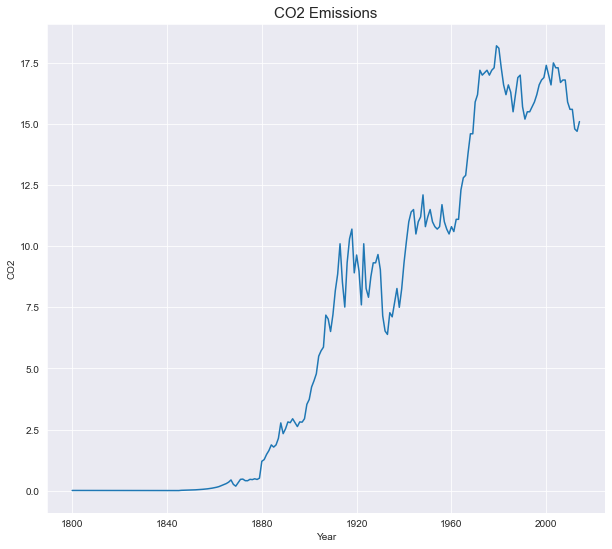

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,9))
sns.lineplot(data = data, x = "Year",y = "CO2")
plt.title('CO2 Emissions', fontsize=15)

array([[<AxesSubplot:title={'center':'CO2'}>]], dtype=object)

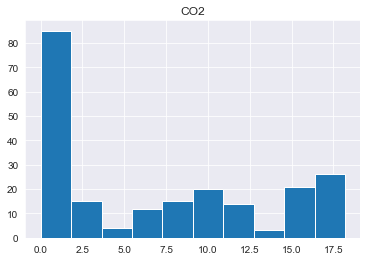

In [15]:
data.hist()

<AxesSubplot:ylabel='Density'>

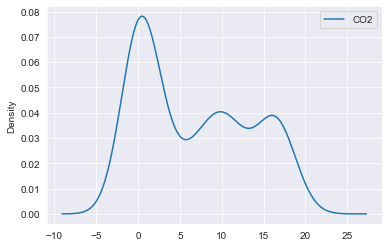

In [16]:
data.plot(kind ='kde')

### Lets us check whether the Data is stationary or not by using Dicky fuller test.                                                      Null hypothesis : Data is non stationary.

In [17]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['CO2'])
print(" P-value statistic : %f" %result[1])
print("Critical Values :")
for x,y in result[4].items():
    print('\t %s :%.3f' %(x,y))
    

 P-value statistic : 0.913633
Critical Values :
	 1% :-3.461
	 5% :-2.875
	 10% :-2.574


### P - VALUE IS >0.05 HENCE , WE FAIL TO REJECT NULL HYPOTHESIS 

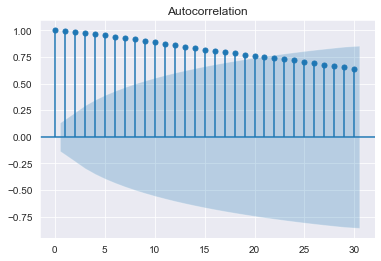

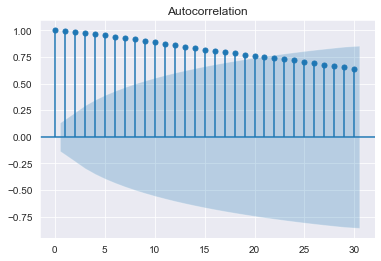

In [18]:
# Actual Data
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data["CO2"],lags = 30)

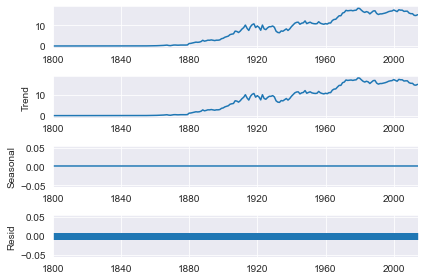

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

res1 = seasonal_decompose(data, model = 'additive')
res1.plot()
pyplot.show()

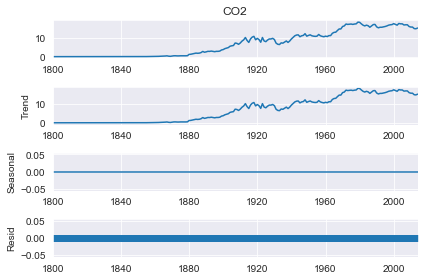

In [20]:
decompose = seasonal_decompose(data["CO2"])
decompose.plot();
plt.rcParams['figure.figsize'] = (12, 8);

## Making the non_stationary data as stationary by using Differencing method.

In [21]:
diff = data - data.shift(1)
diff.head()

,CO2
Year,
1800-01-01,NaN
1801-01-01,-0.00007
1802-01-01,-0.00006
1803-01-01,-0.00007
1804-01-01,-0.00006


Text(0.5, 1.0, 'CO2 Emissions')

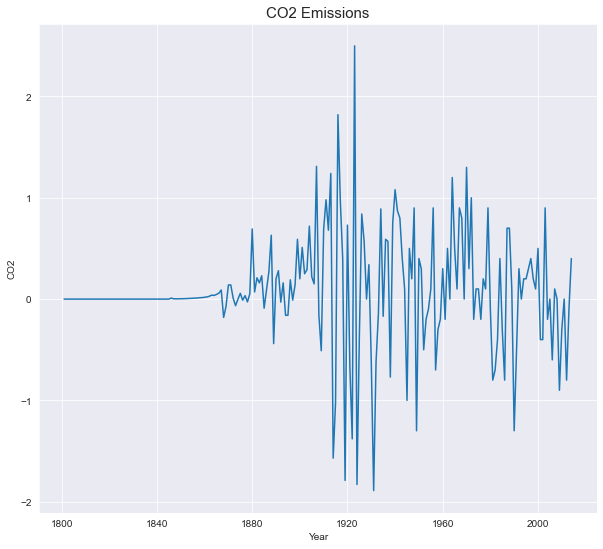

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,9))
sns.lineplot(data = diff, x = "Year",y = "CO2")
plt.title('CO2 Emissions', fontsize=15)

In [23]:
diff1 = diff.dropna()
diff1

,CO2
Year,
1801-01-01,-0.00007
1802-01-01,-0.00006
1803-01-01,-0.00007
1804-01-01,-0.00006
1805-01-01,-0.00006
...,...
2010-01-01,-0.30000
2011-01-01,0.00000
2012-01-01,-0.80000


In [24]:
from statsmodels.tsa.stattools import adfuller
result_1 = adfuller(diff1['CO2'])
print(" P-value statistic : %f" %result_1[1])
print("Critical Values :")
for i,j in result_1[4].items():
    print('\t %s :%.3f' %(i,j))
    

 P-value statistic : 0.003119
Critical Values :
	 1% :-3.464
	 5% :-2.876
	 10% :-2.575


### P - VALUE IS  < 0.05 HENCE , WE CAN CONCLUDE THAT THE DATA IS STATIONARY. Null hypothesis : Data is non stationary.

### TRAIN TEST SPLIT

In [25]:
diff1

,CO2
Year,
1801-01-01,-0.00007
1802-01-01,-0.00006
1803-01-01,-0.00007
1804-01-01,-0.00006
1805-01-01,-0.00006
...,...
2010-01-01,-0.30000
2011-01-01,0.00000
2012-01-01,-0.80000


In [26]:
# lETS US DIVIDE THE DATA INTO TRAIN AND TEST DATA.
train = data.iloc[:191]
test = data.iloc[191:]

In [27]:
train

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542
...,...
1986-01-01,15.50000
1987-01-01,16.20000
1988-01-01,16.90000


In [28]:
test

,CO2
Year,
1991-01-01,15.2
1992-01-01,15.5
1993-01-01,15.5
1994-01-01,15.7
1995-01-01,15.9
1996-01-01,16.2
1997-01-01,16.6
1998-01-01,16.8
1999-01-01,16.9


In [29]:
print('Train_Data:',train.shape,'\t Test_data : ', test.shape)

Train_Data: (191, 1) 	 Test_data :  (24, 1)


### ACF & PACF Plot for Differenced Data

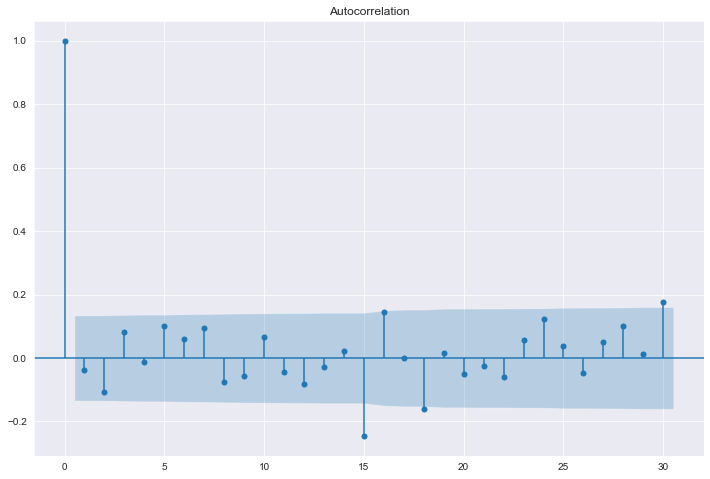

In [30]:
# Differenced Data
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diff1["CO2"],lags = 30);

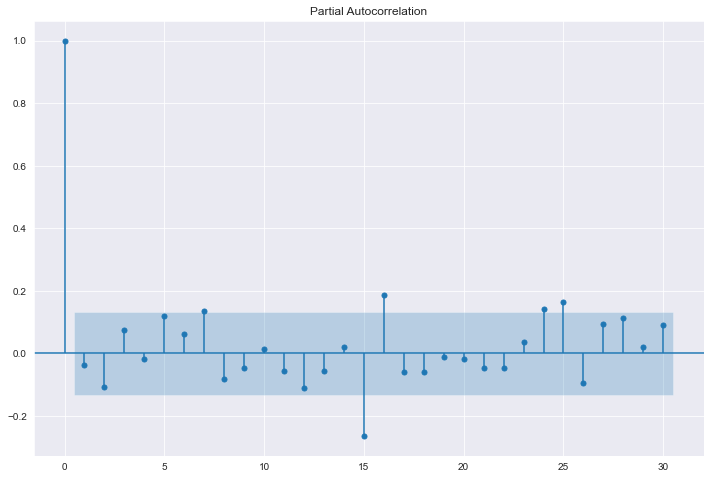

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(diff1["CO2"],lags = 30);

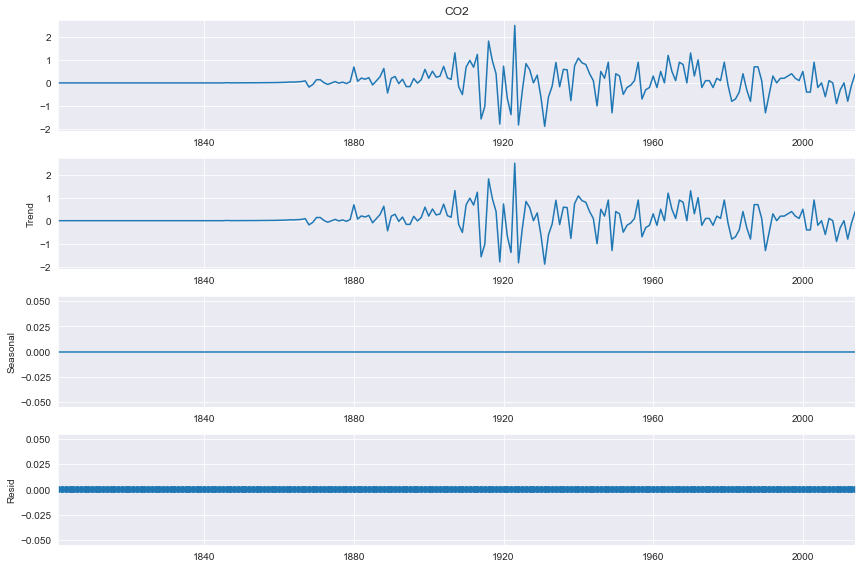

In [32]:
decompose = seasonal_decompose(diff1["CO2"])
decompose.plot();
plt.rcParams['figure.figsize'] = (12, 8);

### AUTO ARIMA MODEL

In [33]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model1 = pm.auto_arima(train['CO2'] ,start_p = 0,start_q = 0,
                      test = 'adf',
                      max_p = 5, max_q = 5,
                      m = 1 ,
                      d = None , 
                      seasonal = False ,
                      start_P = 0 , 
                      D = 0 ,
                      trace = True ,
                      error_action = 'ignore' ,
                      supress_warnings = True ,
                      stepwise = True 
                      ) 


print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=323.253, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=324.676, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=324.513, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=325.334, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=325.976, Time=0.26 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.616 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  191
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -159.626
Date:                Mon, 05 Sep 2022   AIC                            323.253
Time:                        23:47:01   BIC                            329.747
Sample:                             0   HQIC                           325.883
                                - 191                                         
Co

In [34]:
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [35]:
def evaluate_models (train, test, p_values, d_values, q_values) :
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [36]:
p_values = [0, 1, 2, 3, 5, 7]
d_values = range(0, 2)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(train.values, test.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=10.121
ARIMA(0, 0, 1) RMSE=5.206
ARIMA(0, 0, 2) RMSE=3.204
ARIMA(0, 0, 3) RMSE=1.983
ARIMA(0, 1, 0) RMSE=0.419
ARIMA(0, 1, 1) RMSE=0.422
ARIMA(0, 1, 2) RMSE=0.418
ARIMA(0, 1, 3) RMSE=0.409
ARIMA(1, 0, 0) RMSE=0.418
ARIMA(1, 0, 1) RMSE=0.421
ARIMA(1, 0, 2) RMSE=0.417
ARIMA(1, 0, 3) RMSE=0.408
ARIMA(1, 1, 0) RMSE=0.422
ARIMA(1, 1, 1) RMSE=0.410
ARIMA(1, 1, 2) RMSE=0.410
ARIMA(1, 1, 3) RMSE=0.420
ARIMA(2, 0, 0) RMSE=0.421
ARIMA(2, 0, 1) RMSE=0.410
ARIMA(2, 0, 2) RMSE=0.409
ARIMA(2, 0, 3) RMSE=0.415
ARIMA(2, 1, 0) RMSE=0.419
ARIMA(2, 1, 1) RMSE=0.409
ARIMA(2, 1, 2) RMSE=0.427
ARIMA(2, 1, 3) RMSE=0.423
ARIMA(3, 0, 0) RMSE=0.418
ARIMA(3, 0, 1) RMSE=0.408
ARIMA(3, 0, 2) RMSE=0.409
ARIMA(3, 0, 3) RMSE=0.422
ARIMA(3, 1, 0) RMSE=0.412
ARIMA(3, 1, 1) RMSE=0.414
ARIMA(3, 1, 2) RMSE=0.412
ARIMA(3, 1, 3) RMSE=0.405
ARIMA(5, 0, 0) RMSE=0.412
ARIMA(5, 0, 1) RMSE=0.408
ARIMA(5, 0, 2) RMSE=0.406
ARIMA(5, 0, 3) RMSE=0.514
ARIMA(5, 1, 0) RMSE=0.411
ARIMA(5, 1, 1) RMSE=0.424
ARIMA(5, 1,

In [46]:
# Arima Model
model_1 = ARIMA(train['CO2'],order = (7,1,2))
model_1 = model_1.fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  191
Model:                 ARIMA(7, 1, 2)   Log Likelihood                -148.787
Date:                Tue, 06 Sep 2022   AIC                            317.575
Time:                        00:02:05   BIC                            350.045
Sample:                    01-01-1800   HQIC                           330.728
                         - 01-01-1990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2864      0.052     -5.498      0.000      -0.389      -0.184
ar.L2         -0.9839      0.061    -16.225      0.000      -1.103      -0.865
ar.L3          0.0353      0.071      0.499      0.618      -0.103       0.174
ar.L4         -0.0507      0.075     -0.679      0.497      -0.197       0.096
ar.L5          0.2359      0.079      2.983      0.003       0.081       0.391
ar.L6          0.1638      0.056      2.942      0.003       0.055       0.273
ar.L7          0.1763      0.060      2.960      0.003       0.060       0.293
ma.L1          0.2656      0.023     11.377      0.000       0.220       0.311
ma.L2          0.9937      0.091     10.891      0.000       0.815       1.173
sigma2         0.2718      0.030      9.012      0.000       0.213       0.331
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                40.82
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):            8067.66   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
y_pred_1 = model_1.predict(start = len(train), end = len(train) + len(test) - 1)
print(y_pred_1)

1991-01-01    15.494666
1992-01-01    15.572344
1993-01-01    15.839975
1994-01-01    16.007227
1995-01-01    15.542185
1996-01-01    15.272577
1997-01-01    15.555246
1998-01-01    15.754335
1999-01-01    15.530241
2000-01-01    15.387040
2001-01-01    15.530941
2002-01-01    15.553174
2003-01-01    15.457277
2004-01-01    15.504777
2005-01-01    15.543614
2006-01-01    15.452234
2007-01-01    15.450310
2008-01-01    15.546117
2009-01-01    15.514790
2010-01-01    15.434102
2011-01-01    15.484692
2012-01-01    15.535052
2013-01-01    15.475772
2014-01-01    15.457042
Freq: AS-JAN, Name: predicted_mean, dtype: float64


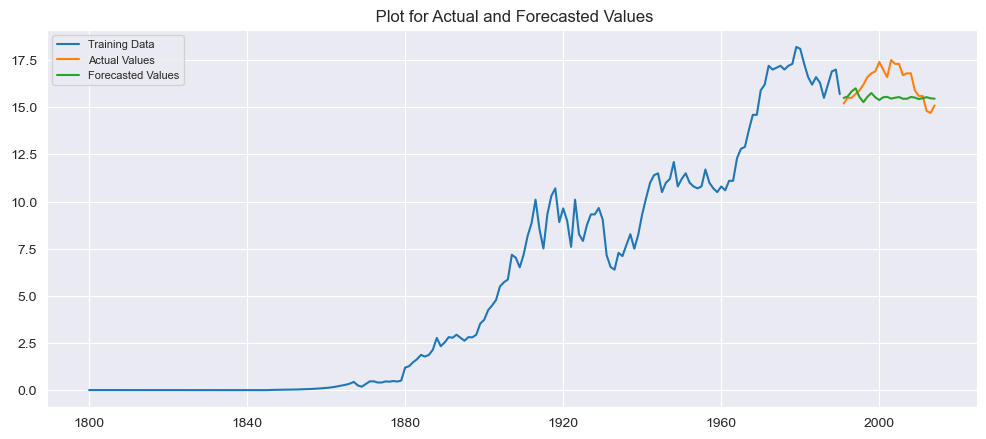

In [85]:
# Plot Actual vs Forecasted Values
plt.figure(figsize = (12,5),dpi=100)
plt.plot (train , label = 'Training Data')
plt.plot(test , label = 'Actual Values')
plt.plot(y_pred_1 , label = 'Forecasted Values')
plt.legend(fontsize = 8)
plt.title(" Plot for Actual and Forecasted Values")
plt.show()

In [49]:
# ORDER (5,1,3)
model_2 = ARIMA(train['CO2'],order = (5,1,3))
model_2 = model_2.fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  191
Model:                 ARIMA(5, 1, 3)   Log Likelihood                -155.274
Date:                Tue, 06 Sep 2022   AIC                            328.549
Time:                        00:02:26   BIC                            357.772
Sample:                    01-01-1800   HQIC                           340.386
                         - 01-01-1990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0272      0.330      3.112      0.002       0.380       1.674
ar.L2          0.3495      0.577      0.606      0.544      -0.781       1.480
ar.L3         -0.4075      0.320     -1.274      0.203      -1.034       0.219
ar.L4         -0.0798      0.113     -0.707      0.480      -0.301       0.142
ar.L5         -0.0347      0.080     -0.432      0.666      -0.192       0.123
ma.L1         -1.0927      0.334     -3.272      0.001      -1.747      -0.438
ma.L2         -0.4073      0.600     -0.679      0.497      -1.582       0.768
ma.L3          0.6761      0.301      2.244      0.025       0.085       1.267
sigma2         0.2991      0.023     13.043      0.000       0.254       0.344
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                77.12
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):            7698.93   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
y_pred_2 = model_2.predict(start = len(train), end = len(train) + len(test) - 1)
print(y_pred_2)

1991-01-01    15.762491
1992-01-01    15.990680
1993-01-01    15.946904
1994-01-01    16.056517
1995-01-01    16.100973
1996-01-01    16.182408
1997-01-01    16.232507
1998-01-01    16.287092
1999-01-01    16.320139
2000-01-01    16.344708
2001-01-01    16.352431
2002-01-01    16.349391
2003-01-01    16.334424
2004-01-01    16.311733
2005-01-01    16.282962
2006-01-01    16.251549
2007-01-01    16.219771
2008-01-01    16.190202
2009-01-01    16.164604
2010-01-01    16.144429
2011-01-01    16.130431
2012-01-01    16.122894
2013-01-01    16.121549
2014-01-01    16.125736
Freq: AS-JAN, Name: predicted_mean, dtype: float64


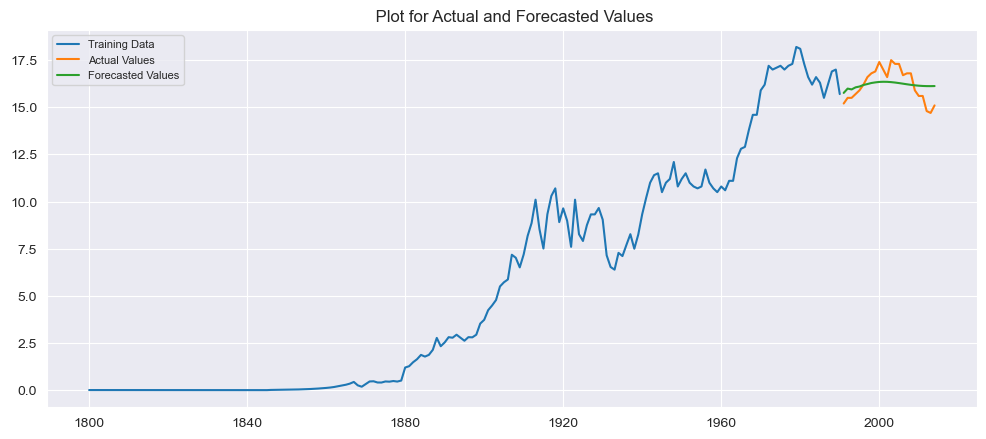

In [84]:
# Plot Actual vs Forecasted Values
plt.figure(figsize = (12,5),dpi=100)
plt.plot (train , label = 'Training Data')
plt.plot(test , label = 'Actual Values')
plt.plot(y_pred_2 , label = 'Forecasted Values')
plt.legend(fontsize = 8)
plt.title(" Plot for Actual and Forecasted Values")
plt.show()

In [73]:
# ORDER (3,1,3)
model_3 = ARIMA(train['CO2'],order = (3,1,3))
model_3 = model_3.fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  191
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -156.193
Date:                Tue, 06 Sep 2022   AIC                            326.386
Time:                        00:07:01   BIC                            349.115
Sample:                    01-01-1800   HQIC                           335.593
                         - 01-01-1990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9961      0.225      4.418      0.000       0.554       1.438
ar.L2          0.4179      0.413      1.011      0.312      -0.392       1.228
ar.L3         -0.5663      0.229     -2.469      0.014      -1.016      -0.117
ma.L1         -1.0126      0.219     -4.614      0.000      -1.443      -0.582
ma.L2         -0.5025      0.402     -1.251      0.211      -1.290       0.285
ma.L3          0.7226      0.217      3.328      0.001       0.297       1.148
sigma2         0.3020      0.022     13.478      0.000       0.258       0.346
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):                94.77
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):            8147.51   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
y_pred_3 = model_3.predict(start = len(train), end = len(train) + len(test) - 1)
print(y_pred_3)

1991-01-01    15.597351
1992-01-01    15.703481
1993-01-01    15.696397
1994-01-01    15.791823
1995-01-01    15.823815
1996-01-01    15.899572
1997-01-01    15.934363
1998-01-01    15.982558
1999-01-01    16.002203
2000-01-01    16.022208
2001-01-01    16.023050
2002-01-01    16.021124
2003-01-01    16.008227
2004-01-01    15.994099
2005-01-01    15.975726
2006-01-01    15.958824
2007-01-01    15.942312
2008-01-01    15.929205
2009-01-01    15.918820
2010-01-01    15.912351
2011-01-01    15.908989
2012-01-01    15.908818
2013-01-01    15.910907
2014-01-01    15.914820
Freq: AS-JAN, Name: predicted_mean, dtype: float64


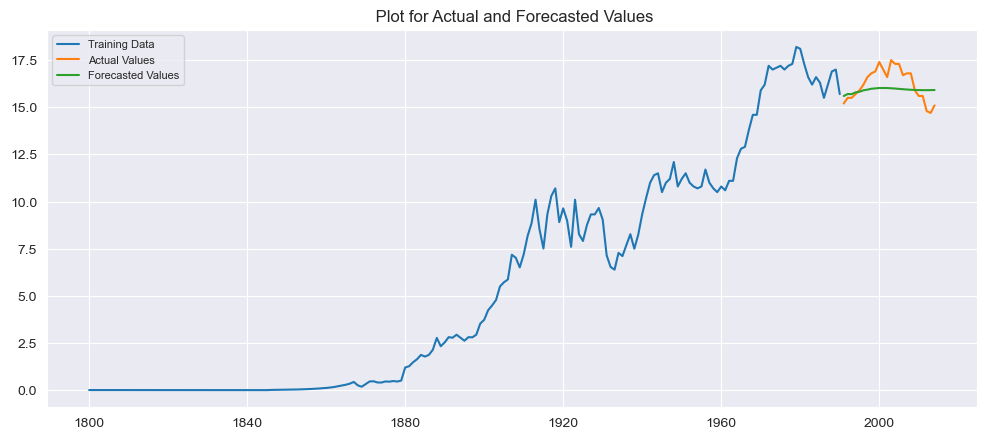

In [83]:
# Plot Actual vs Forecasted Values
plt.figure(figsize = (12,5), dpi = 100)
plt.plot (train , label = 'Training Data')
plt.plot(test , label = 'Actual Values')
plt.plot(y_pred_3 , label = 'Forecasted Values')
plt.legend(fontsize = 8)
plt.title(" Plot for Actual and Forecasted Values")
plt.show()

In [76]:
def accuracy_model(pred,actual) :
    mape = np.mean(np.abs(pred - actual)/np.abs(actual))
    mae = np.mean(np.abs(pred - actual))
    rmse = sqrt(mean_squared_error(actual, pred))
    return({'mape':mape,'mae': mae,'rmse':rmse})

In [77]:
# Order (7,1,2)
acc1 = accuracy_model(y_pred_1.values,test.values)
print(acc1)

{'mape': 0.054151186953850745, 'mae': 0.9021293395153417, 'rmse': 1.109567771719782}


In [78]:
# Order (5,1,3)
acc2 = accuracy_model(y_pred_2.values,test.values)
print(acc2)

{'mape': 0.04684926637141958, 'mae': 0.7563722158028844, 'rmse': 0.7361170549285567}


In [79]:
# Order (3,1,3)
acc3 = accuracy_model(y_pred_3.values,test.values)
print(acc3)

{'mape': 0.04758851514834281, 'mae': 0.7809223053642166, 'rmse': 0.8348736165311497}


## Single Exponential Smoothening

In [80]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model_4 = SimpleExpSmoothing(train).fit(smoothing_level = 0.2,optimized = False)
y_pred_4 = model_4.predict(start = len(train), end = len(train) + len(test) - 1)
print(y_pred_4)

1991-01-01    16.428687
1992-01-01    16.428687
1993-01-01    16.428687
1994-01-01    16.428687
1995-01-01    16.428687
1996-01-01    16.428687
1997-01-01    16.428687
1998-01-01    16.428687
1999-01-01    16.428687
2000-01-01    16.428687
2001-01-01    16.428687
2002-01-01    16.428687
2003-01-01    16.428687
2004-01-01    16.428687
2005-01-01    16.428687
2006-01-01    16.428687
2007-01-01    16.428687
2008-01-01    16.428687
2009-01-01    16.428687
2010-01-01    16.428687
2011-01-01    16.428687
2012-01-01    16.428687
2013-01-01    16.428687
2014-01-01    16.428687
Freq: AS-JAN, dtype: float64


In [89]:
acc4 = accuracy_model(y_pred_4.values,test.values)
print(acc4)

{'mape': 0.047168026310231315, 'mae': 0.7500000000000002, 'rmse': 0.8626683794101243}


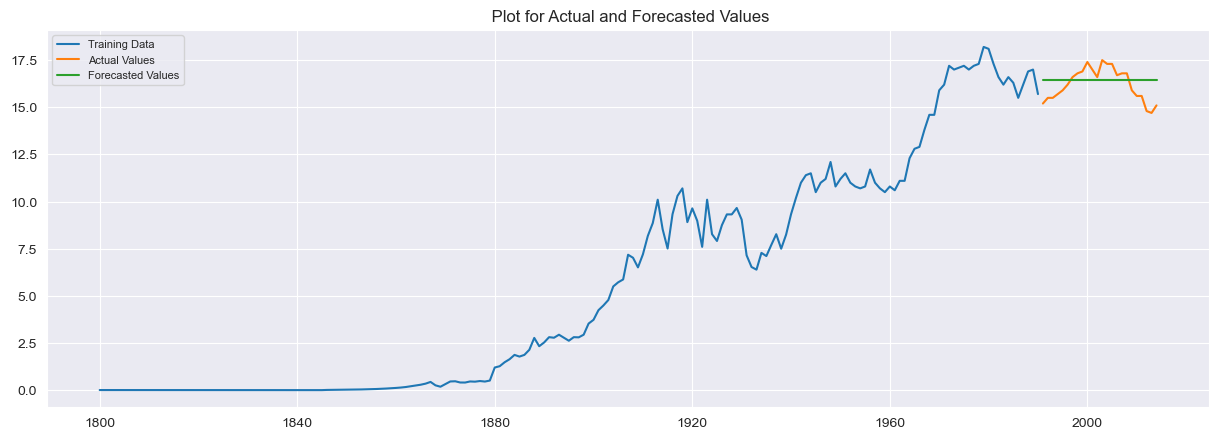

In [82]:
# Plot Actual vs Forecasted Values
plt.figure(figsize = (15,5), dpi = 100)
plt.plot (train, label = 'Training Data')
plt.plot(test, label = 'Actual Values')
plt.plot(y_pred_4 , label = 'Forecasted Values')
plt.legend(fontsize = 8)
plt.title(" Plot for Actual and Forecasted Values")
plt.show()

### HOLT'S METHOD

In [87]:
from statsmodels.tsa.holtwinters import Holt
#from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_5 = Holt(train,exponential=True,damped_trend=False).fit()
y_pred_5 = model_5.predict(start = len(train), end = len(train) + len(test) - 1)
print(y_pred_5)

1991-01-01    15.930772
1992-01-01    16.061068
1993-01-01    16.192429
1994-01-01    16.324865
1995-01-01    16.458384
1996-01-01    16.592995
1997-01-01    16.728707
1998-01-01    16.865529
1999-01-01    17.003470
2000-01-01    17.142539
2001-01-01    17.282745
2002-01-01    17.424099
2003-01-01    17.566608
2004-01-01    17.710283
2005-01-01    17.855133
2006-01-01    18.001168
2007-01-01    18.148397
2008-01-01    18.296830
2009-01-01    18.446478
2010-01-01    18.597349
2011-01-01    18.749454
2012-01-01    18.902804
2013-01-01    19.057407
2014-01-01    19.213275
Freq: AS-JAN, dtype: float64


In [88]:
acc5 = accuracy_model(y_pred_5.values,test.values)
print(acc5)

{'mape': 0.09513153342454388, 'mae': 1.5070568715564387, 'rmse': 1.9083294283559364}


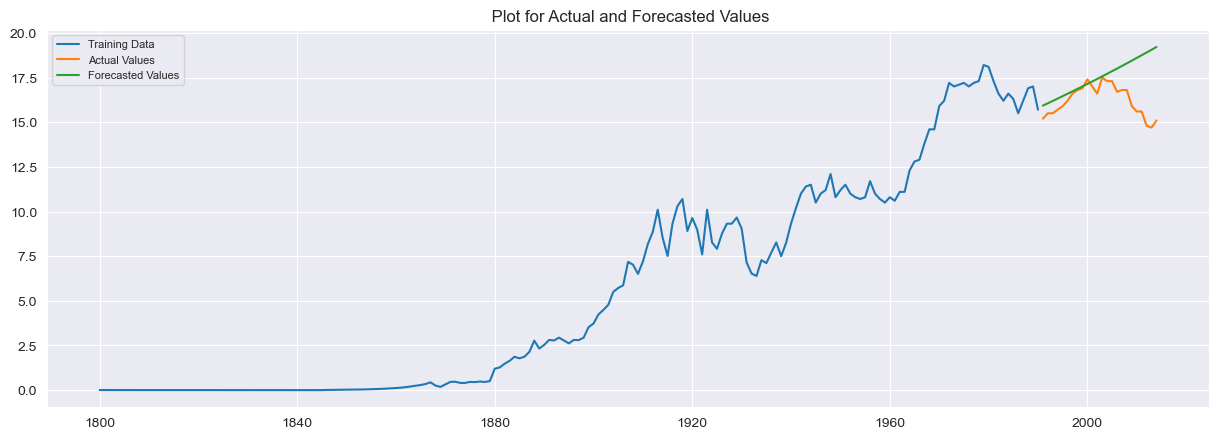

In [90]:
# Plot Actual vs Forecasted Values
plt.figure(figsize = (15,5), dpi = 100)
plt.plot (train, label = 'Training Data')
plt.plot(test, label = 'Actual Values')
plt.plot(y_pred_5 , label = 'Forecasted Values')
plt.legend(fontsize = 8)
plt.title(" Plot for Actual and Forecasted Values")
plt.show()

### HOLT-WINTER METHOD

In [92]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_6 = ExponentialSmoothing(train["CO2"],seasonal="add",trend="add",seasonal_periods=2,damped=True).fit()
y_pred_6 = model_6.predict(start = len(train), end = len(train) + len(test) - 1)
print(y_pred_6)

1991-01-01    15.786899
1992-01-01    15.853439
1993-01-01    15.864398
1994-01-01    15.930551
1995-01-01    15.941124
1996-01-01    16.006893
1997-01-01    16.017084
1998-01-01    16.082474
1999-01-01    16.092287
2000-01-01    16.157301
2001-01-01    16.166740
2002-01-01    16.231381
2003-01-01    16.240450
2004-01-01    16.304723
2005-01-01    16.313425
2006-01-01    16.377333
2007-01-01    16.385672
2008-01-01    16.449218
2009-01-01    16.457198
2010-01-01    16.520387
2011-01-01    16.528011
2012-01-01    16.590846
2013-01-01    16.598117
2014-01-01    16.660601
Freq: AS-JAN, dtype: float64


In [93]:
acc6 = accuracy_model(y_pred_6.values,test.values)
print(acc6)

{'mape': 0.04720573139235259, 'mae': 0.7597657650430745, 'rmse': 0.9080489507230309}


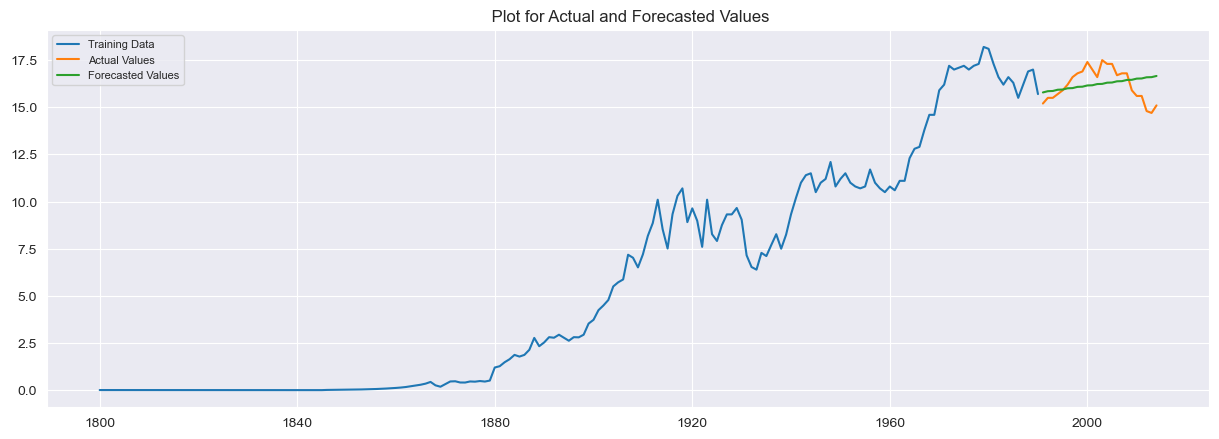

In [94]:
# Plot Actual vs Forecasted Values
plt.figure(figsize = (15,5), dpi = 100)
plt.plot (train, label = 'Training Data')
plt.plot(test, label = 'Actual Values')
plt.plot(y_pred_6 , label = 'Forecasted Values')
plt.legend(fontsize = 8)
plt.title(" Plot for Actual and Forecasted Values")
plt.show()

### FINAL MODEL 

In [95]:
model_final = ARIMA(data['CO2'],order = (5,1,3))
model_final = model_final.fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  215
Model:                 ARIMA(5, 1, 3)   Log Likelihood                -167.229
Date:                Tue, 06 Sep 2022   AIC                            352.457
Time:                        00:24:02   BIC                            382.751
Sample:                    01-01-1800   HQIC                           364.699
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1010      0.296      3.714      0.000       0.520       1.682
ar.L2          0.3736      0.539      0.693      0.489      -0.684       1.431
ar.L3         -0.4161      0.304     -1.368      0.171      -1.012       0.180
ar.L4         -0.0991      0.113     -0.881      0.378      -0.320       0.121
ar.L5         -0.0719      0.081     -0.892      0.372      -0.230       0.086
ma.L1         -1.1776      0.304     -3.878      0.000      -1.773      -0.582
ma.L2         -0.4363      0.558     -0.782      0.434      -1.530       0.657
ma.L3          0.7286      0.281      2.594      0.009       0.178       1.279
sigma2         0.2755      0.022     12.591      0.000       0.233       0.318
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                85.43
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):             231.52   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
model_final.fittedvalues.tail()

Year
2010-01-01    15.731871
2011-01-01    15.421660
2012-01-01    15.291751
2013-01-01    14.538076
2014-01-01    14.539394
dtype: float64

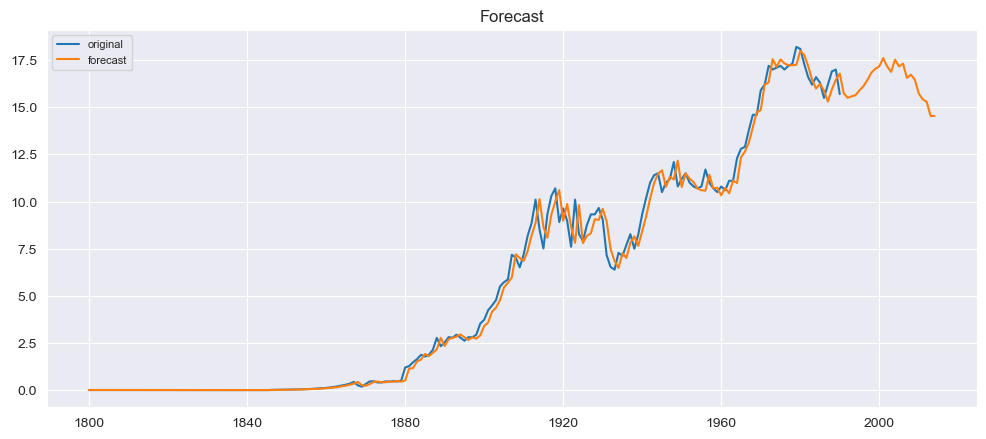

In [101]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='original')
plt.plot(model_final.fittedvalues, label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [102]:
# Saving the pickle file
import pickle
pickle.dump(model_final, open('Forecast_model.pkl','wb'))